# ACTIVITY 1 - DATA MINING (Iris Dataset)
# Author: Matheus Aparecido do Carmo Alves - 9791114

The first step is to import the python packages:

In [1]:
# Importing the packages
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

import pandas as pd

After import, we need to get the Iris dataset, following the code line bellow [2].

The Iris dataset contains the attributes:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. classes: [Iris-setosa, Iris-versicolour, Iris-virginica]

In [2]:
# 1. Getting the Iris data
iris = load_iris()

Now, we need to split the data set into a random train and test subsets as [3].

Note: 
- Train set = 75% of available data; Test set = 25% of available data
- The sets are assembled randomly

In [3]:
# 2. Splitting the data set into random train and test subsets
train_set, test_set, train_class, test_class = \
	train_test_split(iris['data'],iris['target'],train_size=0.75,test_size=0.25)

print('Train set size:',len(train_set))
print('Test set size:',len(test_set),'\n')

Train set size: 112
Test set size: 38 



After split, we will use the set of trains and train classes to train our classification tree as in [4].

In [4]:
# 3. Classification steps
# a. Building the classification tree
classification_tree = tree.DecisionTreeClassifier()
classification_tree = classification_tree.fit(train_set,train_class)

And, with the trained tree, we will classify (predict) the classes of the test set in [5].

In [5]:
# b. classifing the test set (predicting the test set classes)
predict_class = classification_tree.predict(test_set)

This last step represents the classification step.

To show the results, we will build and plot a confusion matrix, following the steps:

1- Calculating the confusion matrix;

In [6]:
# c. calculating the confusion matrix
result = confusion_matrix(test_class,predict_class)
print('Unnormalized Confusion Matrix\n',result,'\n')

Unnormalized Confusion Matrix
 [[14  0  0]
 [ 0 15  1]
 [ 0  1  7]] 



2- Normalizing the resulting confusion matrix;

In [7]:
# d. normalizing the confusion matrix
result = result.astype('float') / result.sum(axis=1)[:, np.newaxis]
print('Normalized Confusion Matrix\n',result)

Normalized Confusion Matrix
 [[1.     0.     0.    ]
 [0.     0.9375 0.0625]
 [0.     0.125  0.875 ]]


3- Getting the confusion matrix labels (classes);

In [8]:
# e. getting the confusion matrix labels
classes = iris.target_names[unique_labels(train_class, predict_class)]

4- Plotting by Matplotlib.

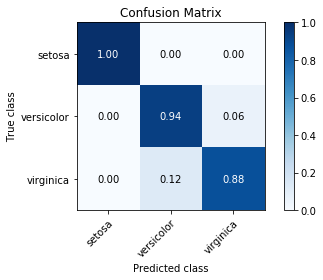

In [9]:
# 4. Plotting the results
# a. configuring the plot
fig, ax = plt.subplots()
im = ax.imshow(result, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(result.shape[1]),yticks=np.arange(result.shape[0]),\
    xticklabels=iris.target_names, yticklabels=iris.target_names,\
    title='Confusion Matrix', ylabel='True class', xlabel='Predicted class')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fmt = '.2f'
thresh = result.max() / 2.
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        ax.text(j, i, format(result[i, j], fmt),\
            ha="center", va="center",\
            color="white" if result[i, j] > thresh else "black")
fig.tight_layout()

# b. plotting
plt.show()